In [30]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import pickle as pk
import matplotlib.cm as cm
from matplotlib.colors import Normalize


In [31]:
genotype_path = '../test_sim_WF_1kbt_10000n_5000000bp_train.pk'


data = pd.read_csv('test_sim_WF_1kbt_13epoch_3500latentg_loss.csv')
data.head()

,epoch,batch,train_loss,test_loss
0,1,1,0.713656,0.644671
1,1,2,0.531019,0.578936
2,1,3,0.491983,0.521827
3,1,4,0.509559,1.350729
4,1,5,0.491309,0.557049


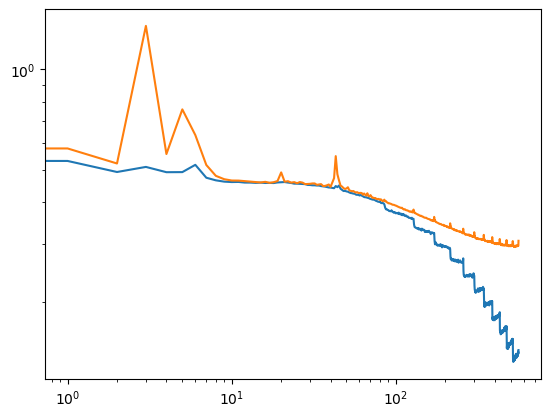

: 

In [39]:
plt.plot(data['train_loss'])
plt.xscale('log')
plt.yscale('log')
plt.plot(data['test_loss'])

In [33]:
df_dim = pd.read_csv('test_sim_WF_1kbt_13epoch_3500latentg_dimensionality.csv')
df_dim['step'] = df_dim['epoch'] + (df_dim['batch'] / df_dim['batch'].max())

loci_cols = [col for col in df_dim.columns if col.startswith('locus_')]


In [34]:
# Load genotype data to calculate MAF
with open(genotype_path, 'rb') as f:
    geno_data = pk.load(f)

# Get genotype array
genotypes = np.array(geno_data['genotypes'])
n_samples, n_loci, n_alleles = genotypes.shape

# Calculate MAF for each locus
allele_counts = np.sum(genotypes, axis=0)
allele_freqs = allele_counts / n_samples
mafs = np.min(allele_freqs, axis=1)

# Extract flattened indices and convert to locus, allele pairs
loci_indices = [int(col.split('_')[1]) for col in loci_cols]
loci_allele_pairs = [(idx // n_alleles, idx % n_alleles) for idx in loci_indices]

# Get MAF for each tracked position
final_mafs = [mafs[pair[0]] for pair in loci_allele_pairs]


Text(0.5, 1.0, 'Evolution of Feature Dimensionality for All Loci')

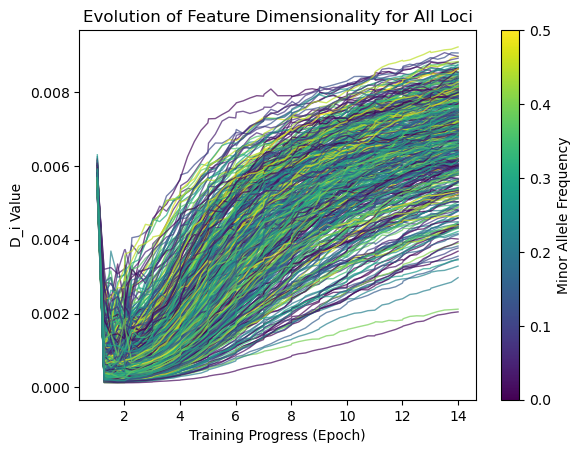

In [35]:
# Create colormap
cmap = cm.viridis
norm = Normalize(vmin=0, vmax=0.5)  # MAF ranges from 0 to 0.5

# Create the plot
fig, ax = plt.subplots()

for i, locus in enumerate(loci_cols):
    color = cmap(norm(final_mafs[i]))
    ax.plot(df_dim['step'], df_dim[locus], linewidth=1, alpha=0.7, color=color)

# Add colorbar with explicit axes reference
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Minor Allele Frequency')

ax.set_xlabel('Training Progress (Epoch)')
ax.set_ylabel('D_i Value')
ax.set_title('Evolution of Feature Dimensionality for All Loci')
